# Training a pet breed detection model with PyTorch

This notebook walks you through the process of using transfer learning to train a pre-trained `mobilenet` to recognize different breeds of cats and dogs. We will be using the [Oxford IIIT Pets dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) in this notebook.This notebook walks you through the process of using transfer learning to train a pre-trained `mobilenet` to recognize different breeds of cats and dogs. 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from torchvision import datasets, models, transforms

## Download and transform the data in the Oxford IIIT Pets dataset

The [Oxford IIIT Pets](http://www.robots.ox.ac.uk/~vgg/data/pets/) dataset contains photos of 37 breeds of dogs and cats, with approximately 200 photos of each one. The dataset is ~800MB in size. All of the photos are stored in a single directory, with the breed of the dog or cat stored in the filename of the photo.

In [4]:
from helper import *
path = os.path.join(os.getcwd(), 'images')
dataset_url = 'http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'

fetch_and_untar(dataset_url, path)

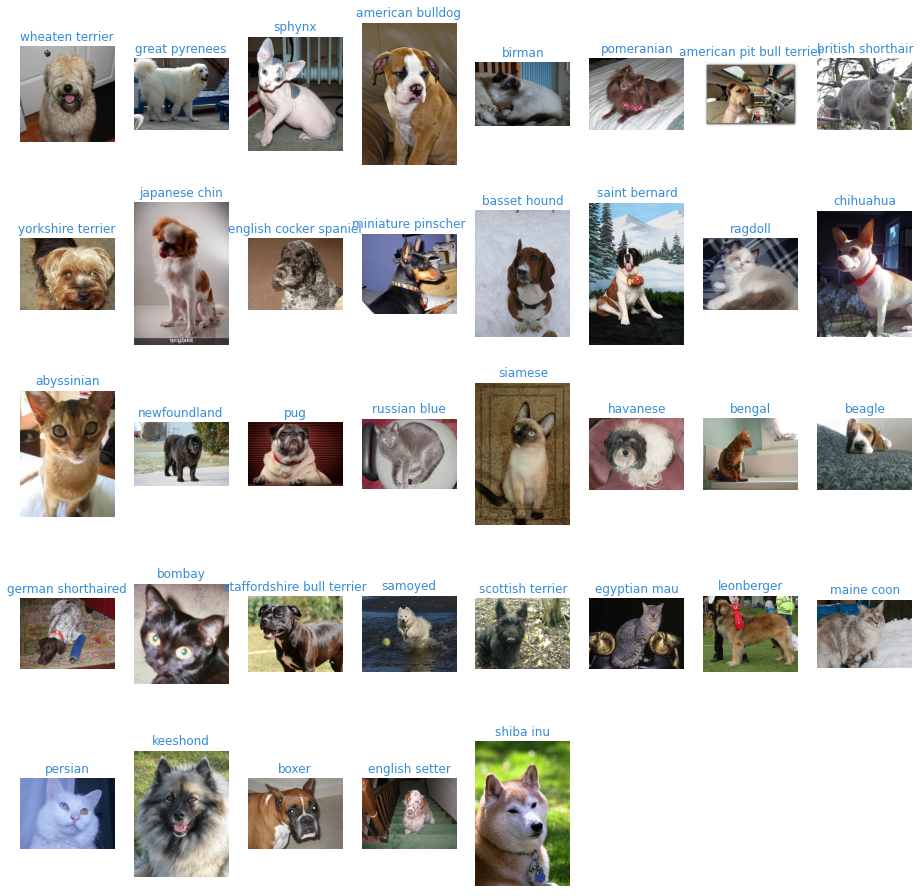

In [6]:
sample_data = get_sample_images_for_each_species(path)
plot_images_in_grid(sample_data, 8)

In [8]:
browse_images(sample_data)

interactive(children=(IntSlider(value=18, description='i', max=36), Output()), _dom_classes=('widget-interact'…

## Transform data into Tensors

In [10]:
# For debugging purposes
crop_trans = transforms.RandomResizedCrop(224)
horz_trans = transforms.RandomHorizontalFlip()
tensor_trans = transforms.ToTensor()
norm_trans = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
img = Image.open('./images/train/shiba_inu/shiba_inu_1.jpg')

In [12]:
img = crop_trans(img)
img = horz_trans(img)
img = tensor_trans(img)
img = norm_trans(img)

AssertionError: img should be PIL Image

In [15]:
dataloaders, dataset_sizes, class_names = transform_images_to_tensors()

# increase font size in VS Code
# focus on telling the story! "at this point im good with my notebook, im good with my cells"
# Azure VM Extension
# i can store images in the az storage
# AML service (more comprehensive service)
# skip new notebook
# Use codespace as the VM

## Define training function

In [27]:
device = use_gpu_if_avail()

In [28]:
model_ft = models.resnet18(pretrained=True)
setup_model(model_ft, device)

## Apply transfer learning

In [29]:
model_ft = train_model(model_ft, device, dataloaders, dataset_sizes, num_epochs=1)

Epoch 0/0
----------
train Loss: 1.7429 Acc: 0.4984
val Loss: 0.5585 Acc: 0.8297

Training complete in 38m 41s
Best val Acc: 0.829730


## Save the best model

In [31]:
save_best_model(model_ft)

# Next Steps: Productionize your code

### Azure Storage
- Create an Azure Storage blob
- Upload the model/checkpoint.pth file to Azure storage in a container named "petdetector"

### Azure Functions
- Create an Azure Functions template project
- Define an AzFn API in your directory
- Create the predict.py file as the model endpoint
- Create a requirements.txt for the Az Function
- Deploy the inference folder to Azure Functions
- Get the connection string for Azure storage and add it as an environment variable ("connect_str") for Azure Functions

### Azure Web Service
- Create a front end html file and put it in a subdirectory (./website/)
- Deploy the website/ folder to Azure App Service, with a Python host, and setting the startup command to be "python -m http.server"
- Go to the Azure portal and set your Azure Function to use https
- Enable CORs for the Azure Function